# Clase 01 - Visualización de gráficos básicos

Profesor: **Fernando Becerra**, f.becerra@udd.cl, www.fernandobecerra.com

Esta es la primera clase práctica del curso "Visualización de la Información" del Diplomado y Magíster de Data Science de la Universidad del Desarrollo. Este notebook servirá de introducción al uso de [matplotlib](https://matplotlib.org) y [pandas](https://pandas.pydata.org) para el análisis y visualización de datos. Comenzaremos viendo lo más básico, desde las distintas componentes de una figura de matplotlib hasta hacer gráficos de líneas, barras, torta, áreas y burbujas.

## Partes de una figura de matplotlib

Para comenzar, nos familiaricemos con los distintos elementos que componen una figura en `matplotlib`. Es bueno hacer la diferencia entre `figure`, `axes`, y `axis`, ya que esto nos permitirá más adelante manejarlos y personalizarlos a nuestro gusto.

In [39]:
from IPython.display import Image

La antigua versión de `matplotlib` usaba esta figura para hacer visualizar los diferentes componentes.

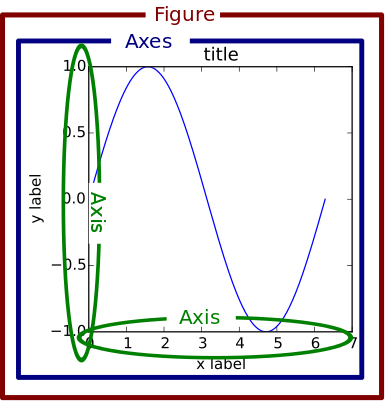

In [40]:
Image("https://matplotlib.org/1.5.1/_images/fig_map.png")

La [nueva documentación](https://matplotlib.org/stable/gallery/showcase/anatomy.html) incluye una figura un poco más ilustrativa, además de los comandos para acceder a cada una de las componentes. Esto nos permitirá modificarlas asta el último detalle.

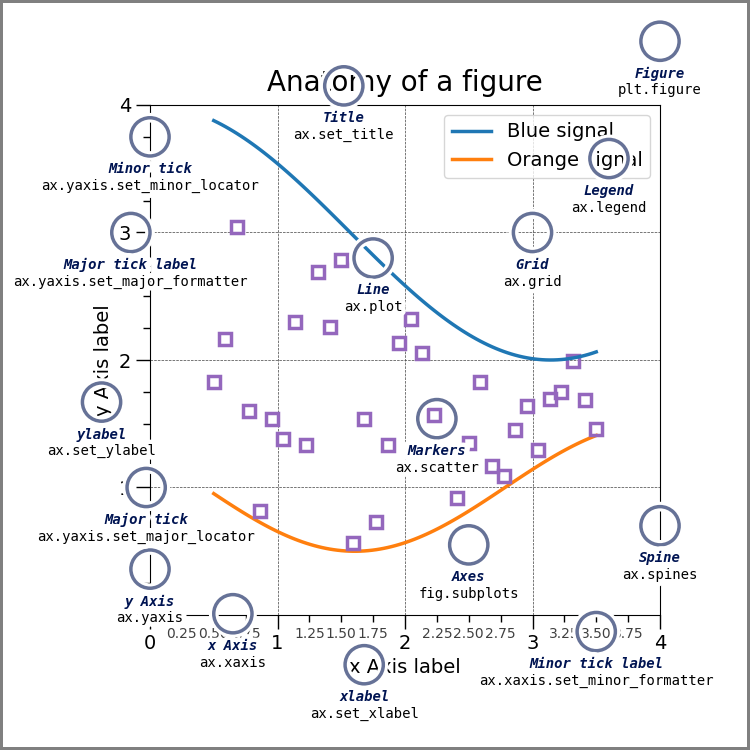

In [41]:
Image("https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png")

Ahora veamos el código. Lo primero que se debe hacer es importar las librerías que se ocuparán. En este caso importaremos `matplotlib` y `numpy`, lo cual nos permitirá crear datos y graficarlos

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

Cada vez que importamos paquetes tenemos que asegurarnos que esten instalados. Si no los tenemos, entonces hay que crear una celda nueva y ejecutra `!pip install xxxx`, donde `xxxx` es el nombre del paquete a instalar.

Ahora creamos los arreglos `x` e `y` que usaremos para nuestra demostración. El `y` será simplemente la función coseno de `x`, variable que va desde -5 a 5.

In [43]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

Formas de graficar hay varias, pero nosotros usaremos una que nos dará mayor control sobre cada componente del gráfico. Para eso usaremos la rutina `plt.subplots` la cual nos arroja una `figure` y un `axes` que más adelante podemos modificar y ajustar. 

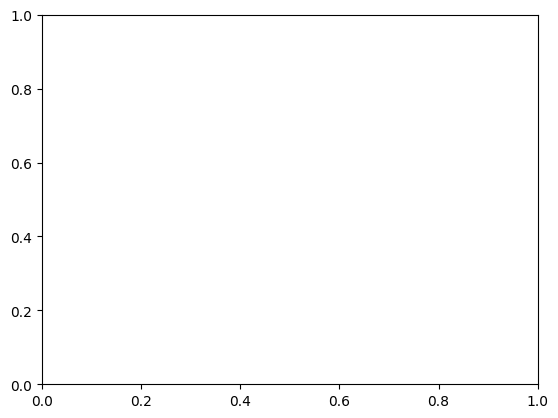

In [44]:
fig, ax = plt.subplots()

La otra ventaja del `subplots` es que nos permite definiar más de un `axes`, o dicho de otra forma, una grilla de gráficos. Pueden ser tanto horizontal como verticalmente, dependiendo de los parámetros que le demos.

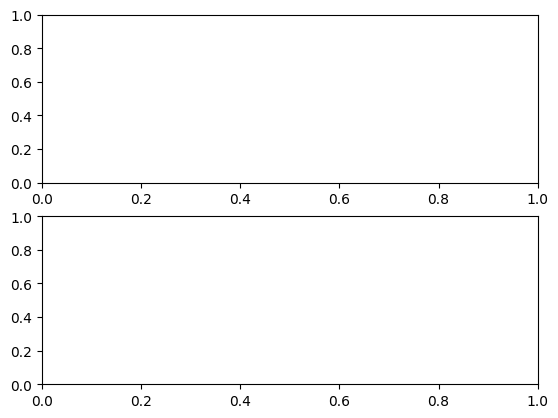

In [45]:
fig, ax = plt.subplots(2,1)

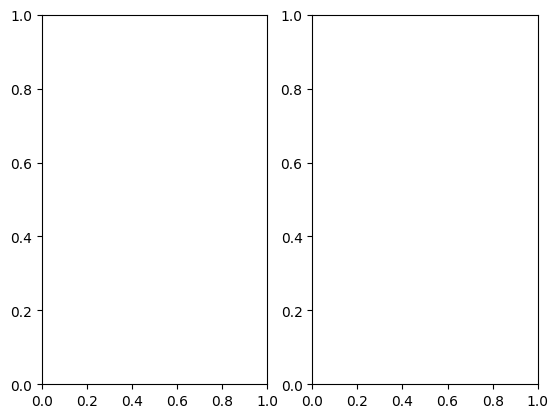

In [46]:
fig, ax = plt.subplots(1,2)

Veamos un ejemplo del nivel de personalizacion que podemos alcanzar modificando el `ax`.

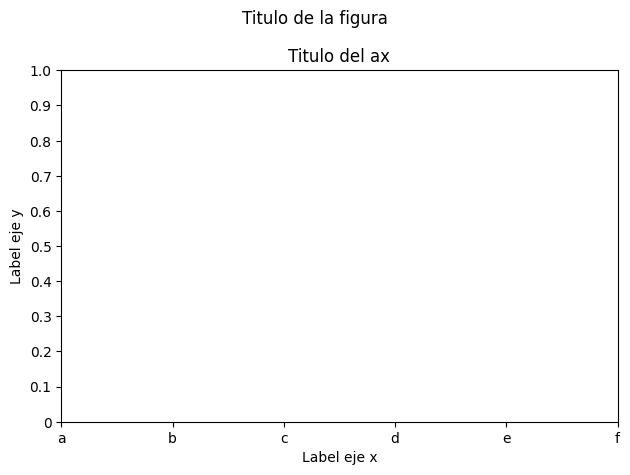

In [47]:
fig, ax = plt.subplots()

ax.set_title("Titulo del ax")
ax.set_xlabel("Label eje x")
ax.set_ylabel("Label eje y")

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])

fig.suptitle("Titulo de la figura")

fig.tight_layout()

## Line chart

Comenzaremos haciendo uno de los gráficos más comunes: el gráfico de líneas. Aprovecharemos también para usar algunas funciones para personalizar el título y los ejes del gráfico.

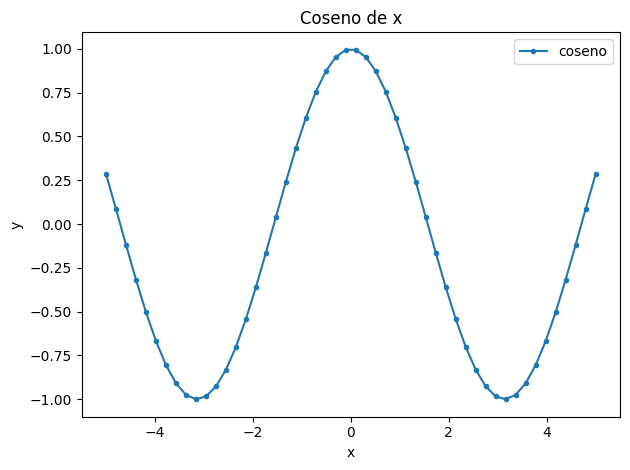

In [48]:
fig, ax = plt.subplots()

ax.plot(x, y, ".-", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Así vamos a ir agregando más cosas de a poco. Primero agregamos círculos para marcar cada dato.

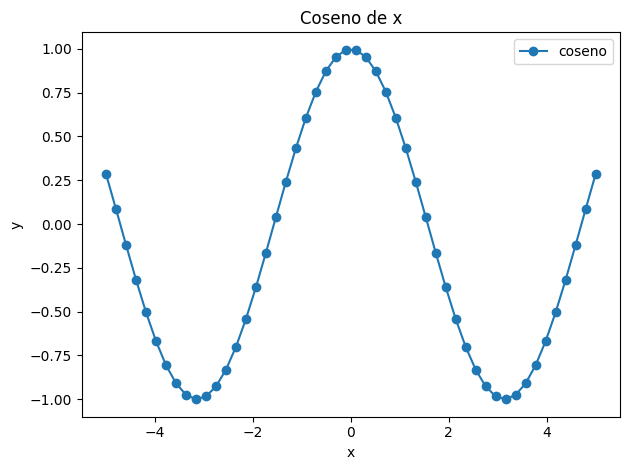

In [49]:
fig, ax = plt.subplots()

ax.plot(x, y, "o-", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Ahora pobramos con colores distintos.

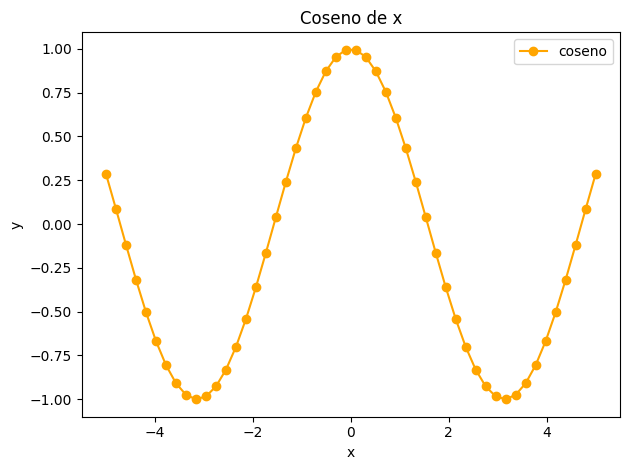

In [50]:
fig, ax = plt.subplots()

ax.plot(x, y, "o-", color="orange", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Ahora añadimos una segunda curva al mismo gráfico, para lo cual definimos la variable `z` como el seno de x. Posteriormente la graficamos usando un color de línea y un símbolo distinto al ya usado por la función coseno. En este caso hay que tener cuidado con el nombre del gráfico porque la función ya no corresponde solamente al coseno de x.

In [51]:
z = np.sin(x)

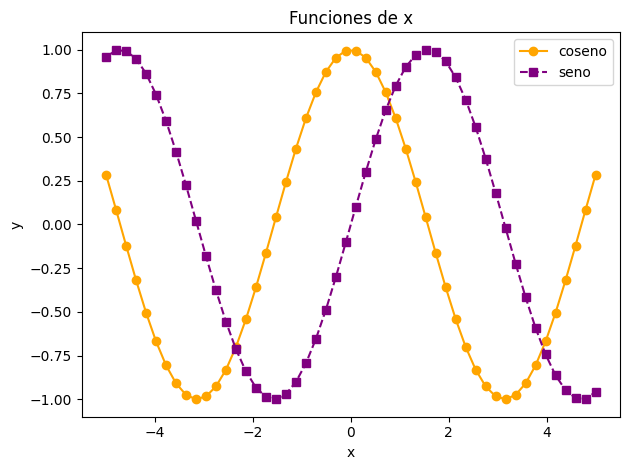

In [52]:
fig, ax = plt.subplots()

ax.plot(x, y, "o-", color="orange", label="coseno")
ax.plot(x, z, "s--", color="purple", label="seno")
ax.set_title("Funciones de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Ahora podemos graficar cada curva en uno de esos `axes` para separarlas. Y podemos agregar el título y el nombre de los ejes por separado a cada `axes`

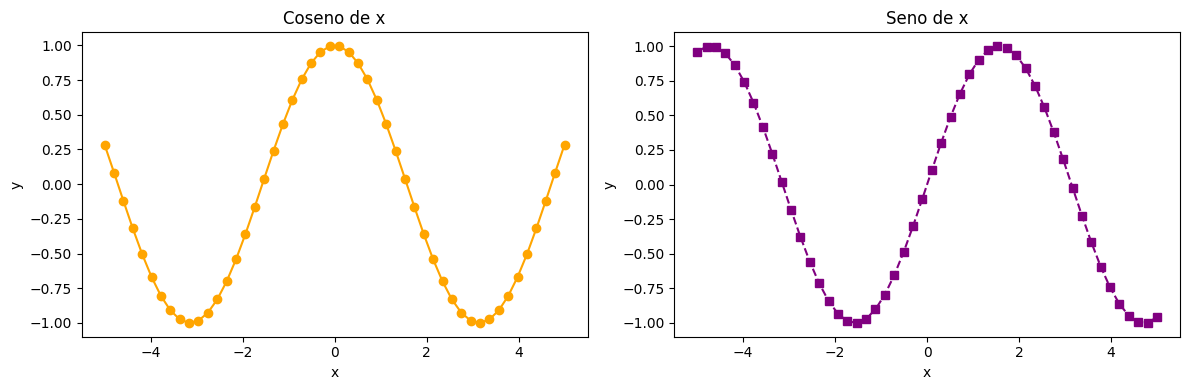

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, "o-", color="orange", label="coseno")
ax[0].set_title("Coseno de x")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, z, "s--", color="purple", label="seno")
ax[1].set_title("Seno de x")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

fig.tight_layout()

## Scatter plot

Para este ejercicio ocuparemos los datos de Gapminder, que muestran el PBI per cápita y la expectativa de vida para cada país, además de la población y del continente al cual pertenecen. Para cargar estos datos usaremos `pandas` y comenzaremos a trabajar con dataframes.

In [54]:
import pandas as pd

In [55]:
df_scatter = pd.read_csv("../datos/rosling.csv")
df_scatter.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


Definimos las variables `x` e `y` que usaremos para el gráfico.

In [56]:
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'

Por ahora, siguiendo la lógica del gráfico de línea, usaremos `ax.scatter` para el gráfico de dispersión.

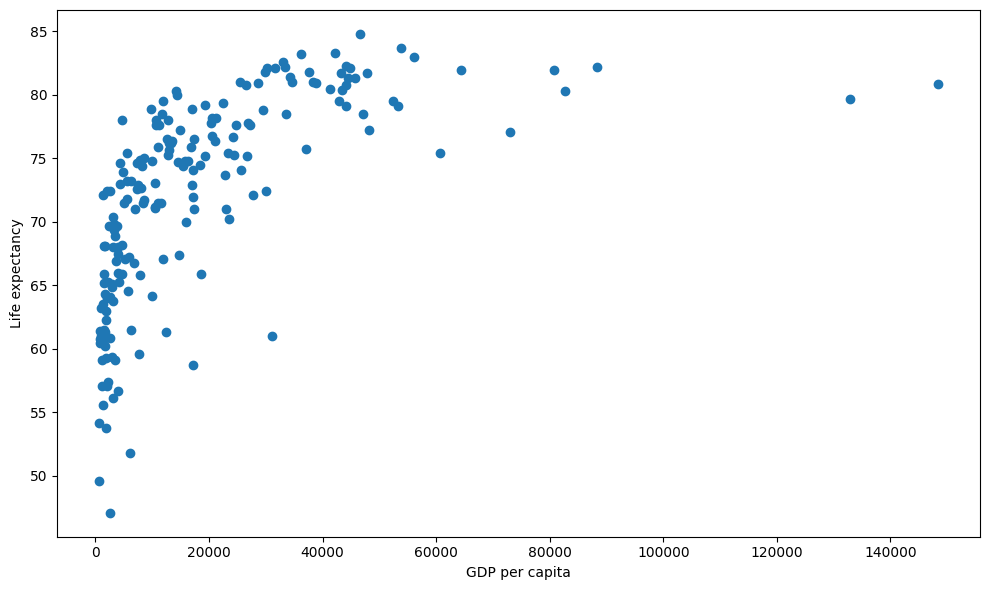

In [57]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

## Bubble chart

Ahora podemos usar la población de cada país como el radio de los círculos.

In [58]:
size = 'Population'

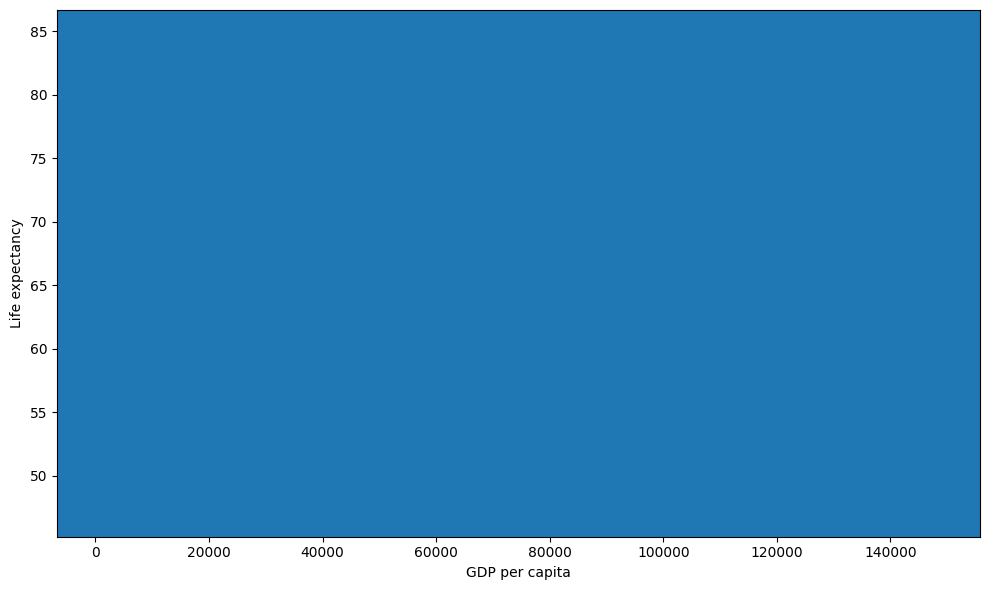

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter[size])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Bueno, hay que normalizar la población a un valor que nos permita graficar, así que se necesitan unos cálculos extras.

In [60]:
max_population = df_scatter[size].max()
df_scatter['size'] = 2000 * df_scatter[size] / max_population

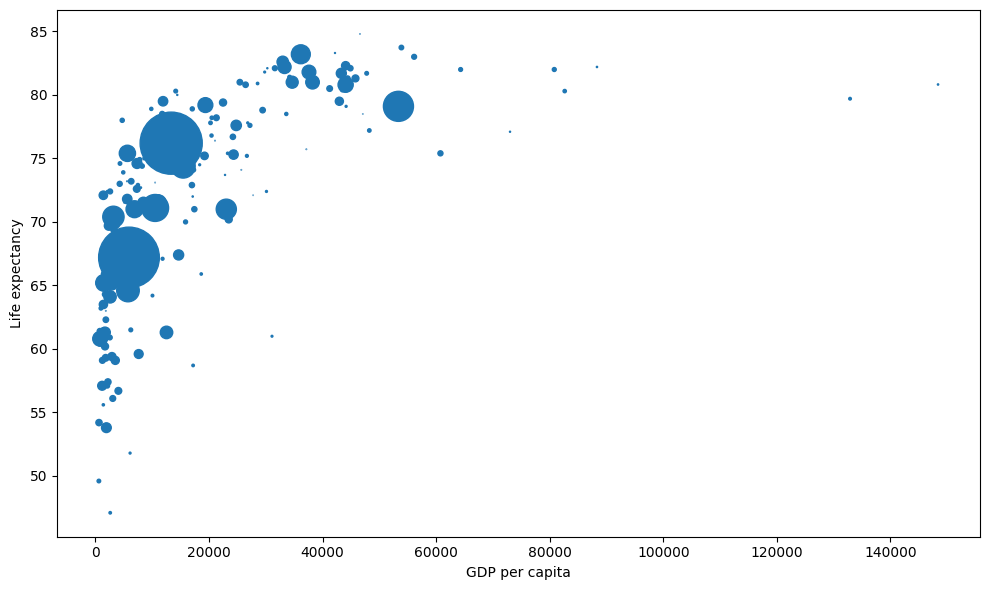

In [61]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Muchos de estos métodos de `ax` están incluidos por defecto en la rutina `df.plot` de un dataframe, lo que facilita mucho hacer algunos gráficos. Sin embargo, `pandas` no tiene nuevos métodos para crear gráficos, sino que integra los ya definidos en `matplotlib`, es por eso que para poder modificarlos hay que estar familiarizados con `matplotlib` primero. 

<Axes: xlabel='GDP per capita', ylabel='Life expectancy'>

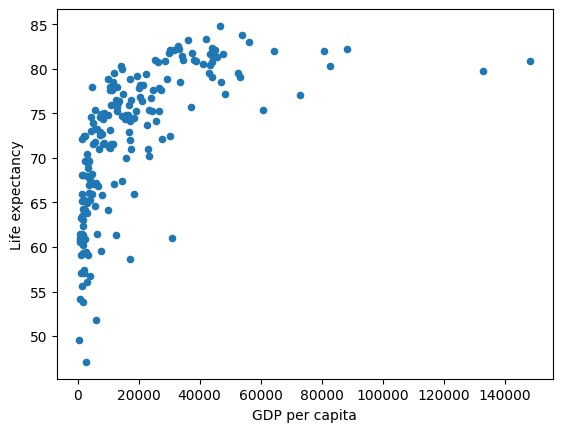

In [62]:
df_scatter.plot.scatter(x=xlabel, y=ylabel)

Probemos cambiando la escala de uno de los ejes.

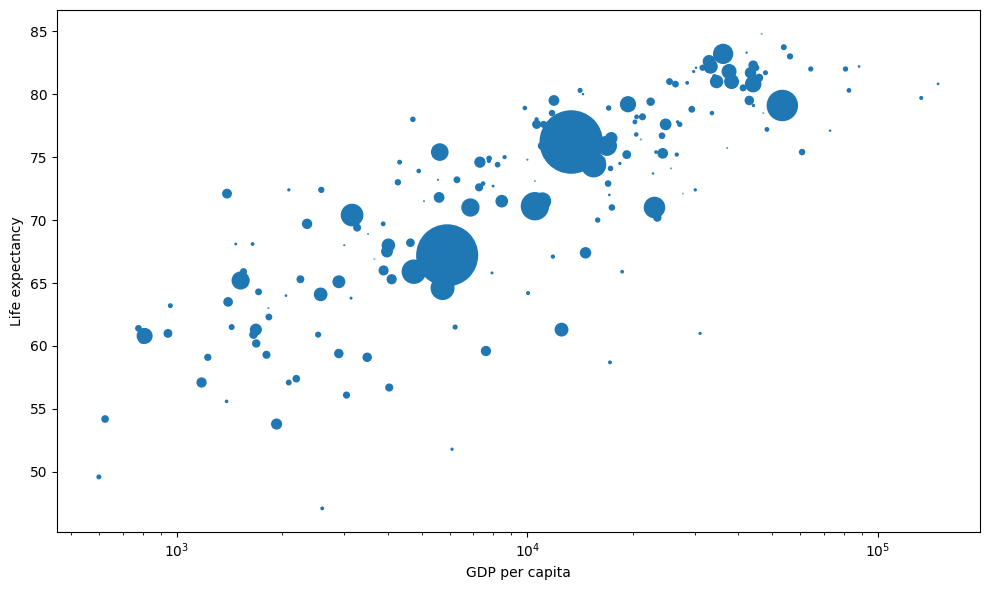

In [63]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

fig.tight_layout()

## Bar chart

Para esto, ocuparemos datos de la Encuesta Suplementaria de Ingresos del Instituto Nacional de Estadísticas.

In [64]:
df_bars = pd.read_csv("../datos/esi2022.csv")
df_bars.head()

,Tramos de ingresos en pesos ($),Proporción de personas ocupadas (%)
0,0-100.000,5.4
1,100.000-200.000,5.4
2,200.000-300.000,6.3
3,300.000-400.000,12.5
4,400.000-500.000,17.3


En este caso, usaremos directamente el método que viene en el dataframe

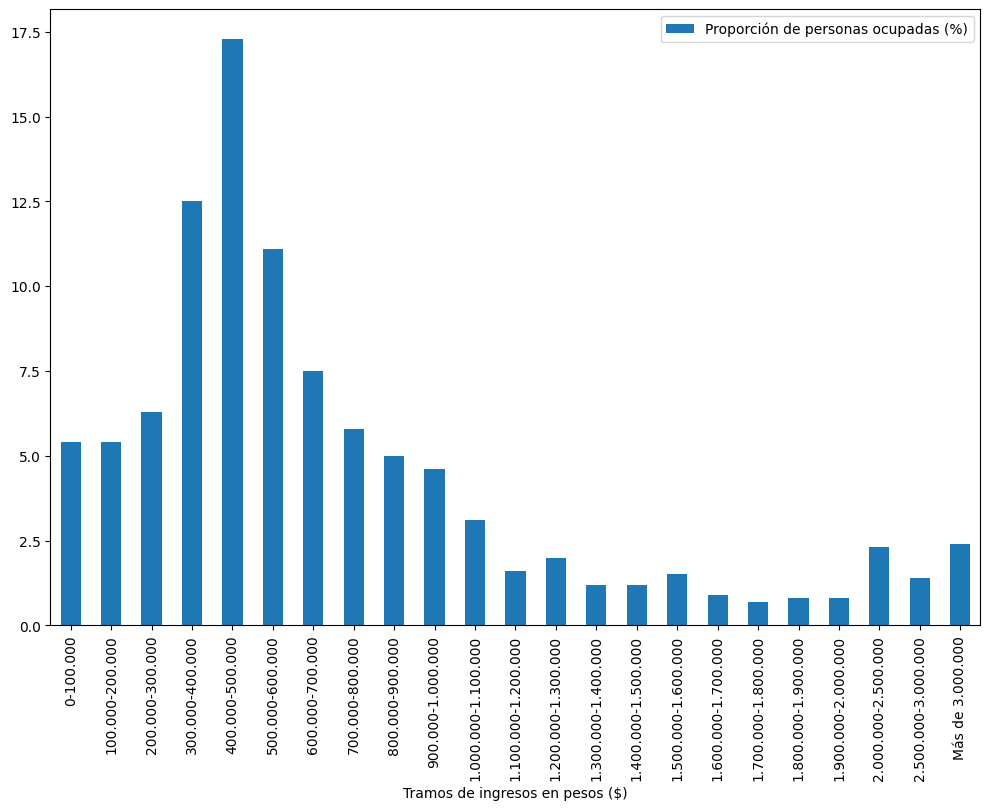

In [65]:
xlabel_bar = 'Tramos de ingresos en pesos ($)'
ylabel_bar = 'Proporción de personas ocupadas (%)'

ax = df_bars.plot.bar(x=xlabel_bar, y=ylabel_bar, figsize=(12,8))

Entre otras cosas, podemos modificar el ancho de las barras.

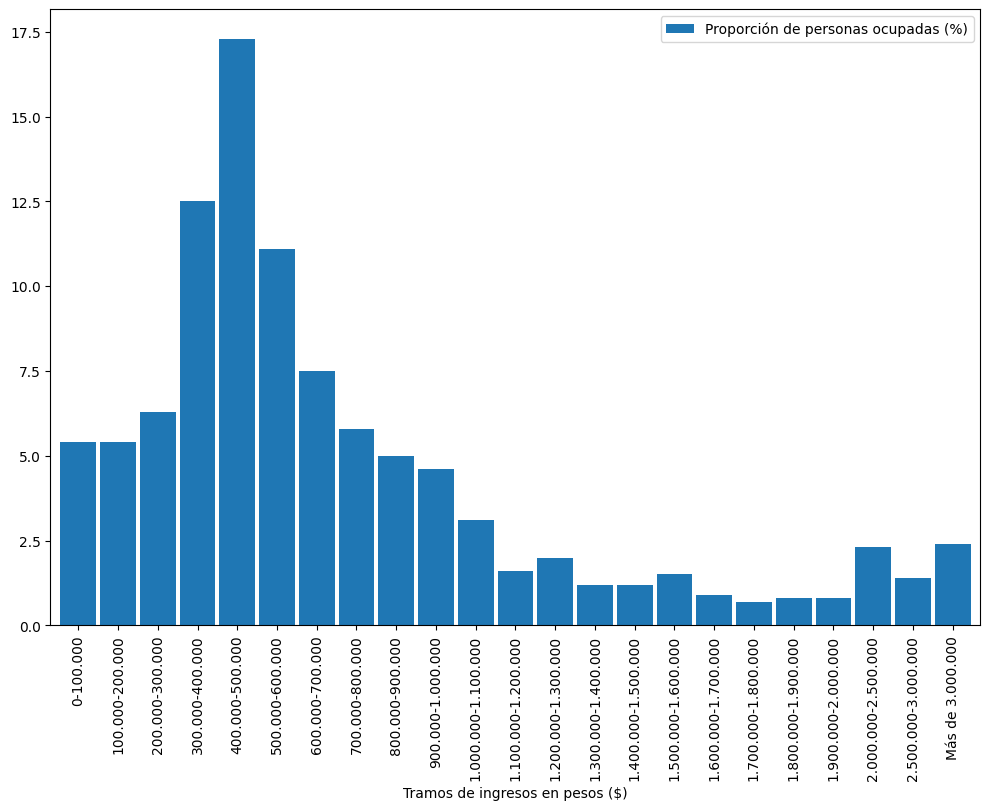

In [66]:
ax = df_bars.plot.bar(x=xlabel_bar, y=ylabel_bar, figsize=(12,8), width=0.9)

Como también podemos graficar las barra horizontalmente usando `barh`

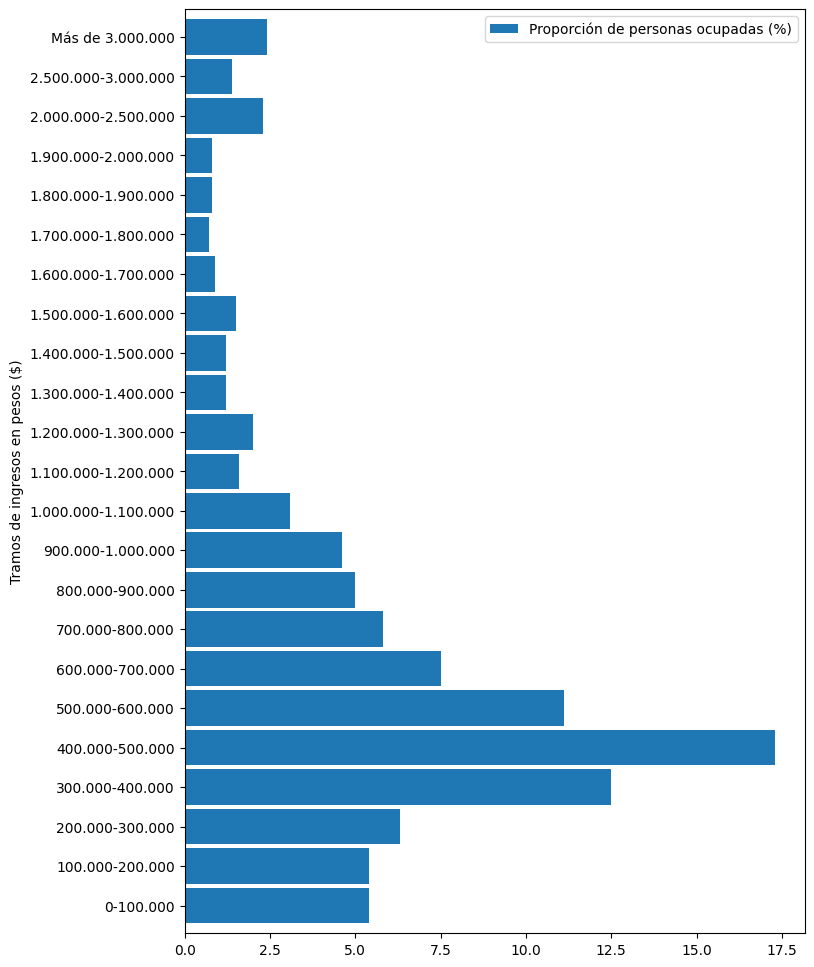

In [67]:
ax = df_bars.plot.barh(x=xlabel_bar, y=ylabel_bar, figsize=(8,12), width=0.9)

Por último, los dataframe de `pandas` también pueden recibir como argumento un `axes` creado con anterioridad, lo que nos permite ubicarlos justo en el lugar que queremos. Por ejemplo, podemos crear una grilla de `axes` y ubicar nuestros gráficos ahí.

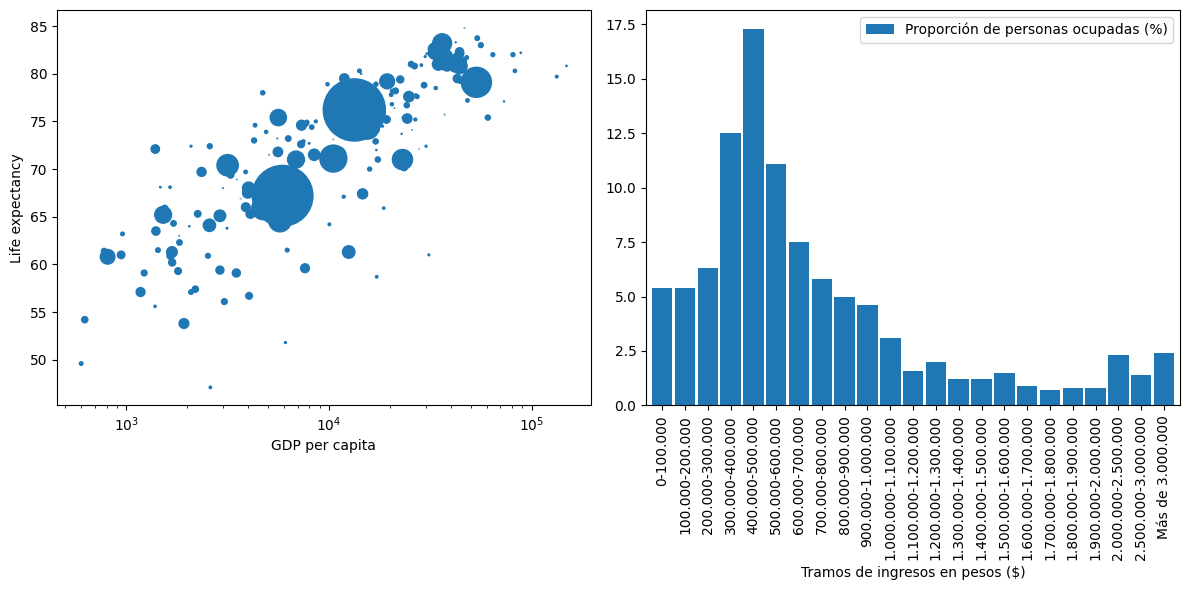

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_scatter.plot.scatter(x='GDP per capita', y='Life expectancy', s='size', ax=ax[0])
df_bars.plot.bar(x=xlabel_bar, y=ylabel_bar, width=0.9, ax=ax[1])

ax[0].set_xscale('log')

fig.tight_layout()

## Grouped bar chart

Primero definimos los datos.

In [69]:
data = {
    'type': ['A', 'B', 'C', 'E', 'F'],
    'var1': [12, 28, 1, 8, 22],
    'var2': [28, 7, 16, 4, 10],
    'var3': [25, 3, 23, 25, 17]
}

df = pd.DataFrame.from_dict(data)

`pandas` nos facilita enormemente graficar barras agrupadas.

<Axes: xlabel='type'>

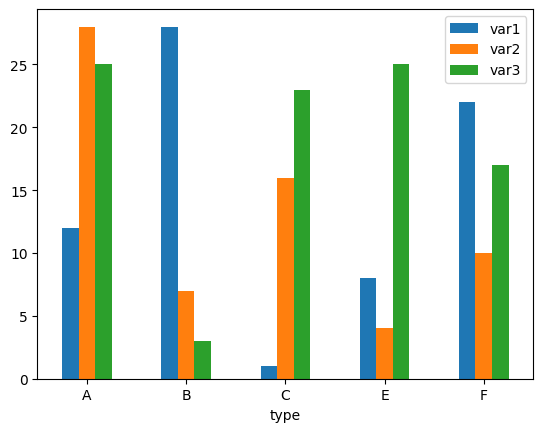

In [70]:
df.plot.bar(x='type', rot=0)

## Stacked bar chart

Lo mismo para el stacked bar chart. Hacer esto en `matplotlib` sin la ayuda de `pandas` no es tan fácil.

<Axes: xlabel='type'>

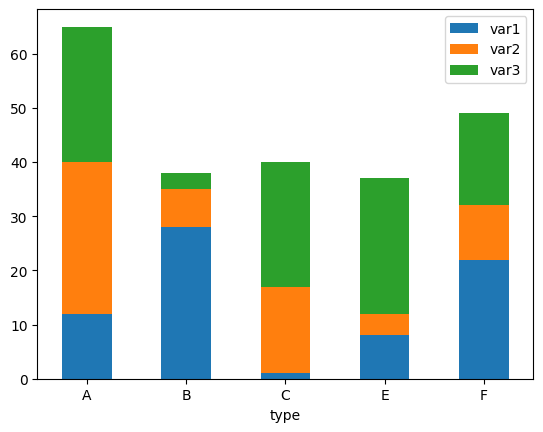

In [71]:
df.plot.bar(x='type', rot=0, stacked=True)

## Stacked area

Primero veremos la forma de hacerlo en `matplotlib`.

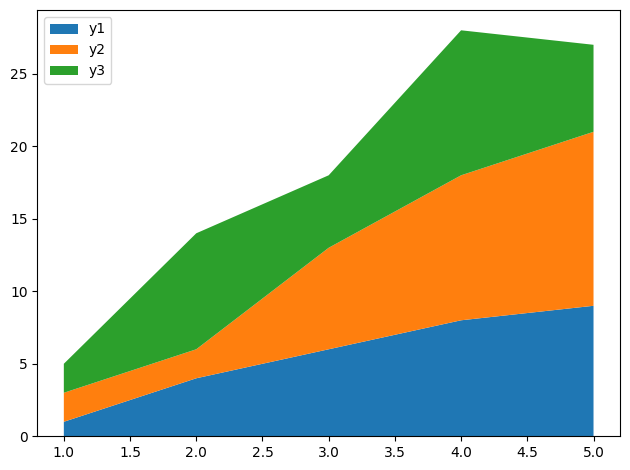

In [72]:
x = range(1,6)
y1 = [1,4,6,8,9]
y2 = [2,2,7,10,12]
y3 = [2,8,5,10,6]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, y3, labels=['y1','y2', 'y3'])
ax.legend(loc='upper left')

fig.tight_layout()

Y ahora lo comparamos con el método en `pandas`.

In [73]:
data = {
    'x': range(1,6),
    'y1': [1,4,6,8,9],
    'y2': [2,2,7,10,12],
    'y3': [2,8,5,10,6]
}

df = pd.DataFrame.from_dict(data)

<Axes: >

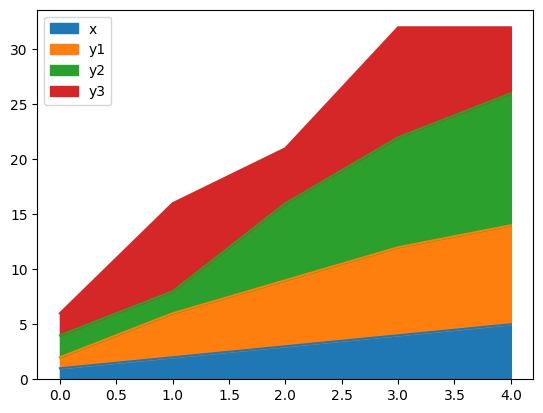

In [74]:
df.plot.area()

Aqui siempre hay que tener cuidado con lo que `pandas` grafica por defecto. Por ejemplo, en este caso incluyó la variable `x`, la cual probablemente no queremos incluir en el gráfico. Para eso tenemos la opción de especificar qué variables queremos incluir.

<Axes: >

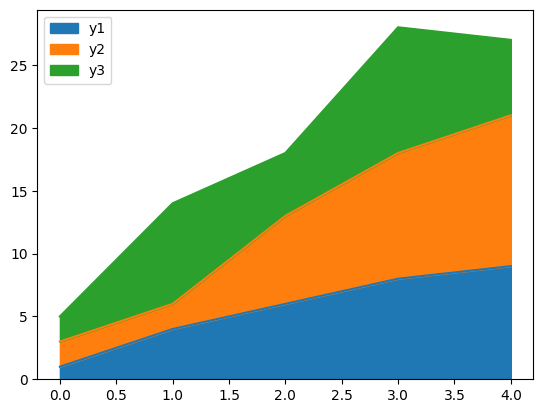

In [75]:
df.plot.area(y=['y1', 'y2', 'y3'])

Para ahondar más en todos los tipos de gráficos que vienen incluidos en `pandas`, pueden visitar [la documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) de `df.plot`. Para ver recetas de cómo hacer otros tipos de gráficos, pueden visitar [este sitio web](https://python-graph-gallery.com/) y jugar con los códigos que hay ahí. Algunos de esos los veremos la próxima semana.